In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('3_user_data.csv')

In [3]:
data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs = pd.read_csv('3_logs.csv')

In [5]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [8]:
data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

**Сколько уникальных значений принимает переменная platform?**

In [11]:
logs.platform.nunique()

3

**Какой клиент совершил больше всего успешных операций?**

In [13]:
success_counts = logs\
    .query('success == True')\
    .groupby(['client', 'success'], as_index=False)\
    .agg({'success': 'count'})\
    .sort_values(['success', 'client'], ascending=[False,False])\
    .head(10)

In [14]:
success_counts

,client,success
2626,92584,41
2345,82563,41
2231,78349,41
1759,61473,41
1758,61468,41
1487,52870,41
1020,36165,41
810,28719,41
332,12179,41
1826,64064,40


**С какой платформы осуществляется наибольшее количество успешных операций?**

In [16]:
most_used_platform = logs\
    .query('success == True')\
    .groupby(['platform', 'success'], as_index=False)\
    .agg({'success': 'count'})\
    .sort_values('success', ascending=False)

In [17]:
most_used_platform

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


**Какая платформа наиболее популярна среди премиумных клиентов?**

In [19]:
clients_logs = logs.merge(data, on='client')

In [20]:
clients_logs.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [21]:
premium_most_used_platform = clients_logs\
    .value_counts('platform', normalize=True)\
    .mul(100)\
    .round(2)

In [22]:
premium_most_used_platform

platform
phone       61.56
computer    33.15
tablet       5.29
dtype: float64

**Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет). 
Какой график получится в результате?**

<AxesSubplot:xlabel='age', ylabel='Count'>

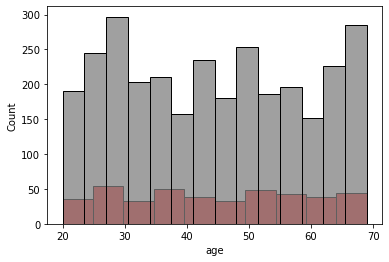

In [24]:
sns.histplot(clients_logs.query('premium == True').age, color='red')
sns.histplot(clients_logs.query('premium == False').age, color='grey')

**Постройте график распределения числа успешных операций: 
x – число успешных операций
y – число клиентов, совершивших столько успешных операций**

In [27]:
success_operations = logs\
    .query('success == True')\
    .groupby(['client'])\
    .agg({'success': 'count'})

In [28]:
success_operations.head()

,success
client,
40,1
50,1
75,1
81,1
132,1


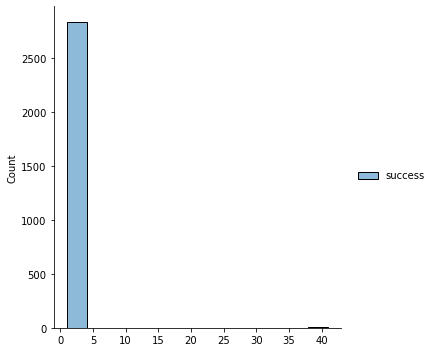

In [29]:
sns.displot(success_operations)

**Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
По оси x – возраст, y – число успешных операций.**

In [32]:
platform_by_age = clients_logs\
    .query('platform == "computer" and success == True')

In [34]:
platform_by_age.head()

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25


<AxesSubplot:xlabel='age', ylabel='count'>

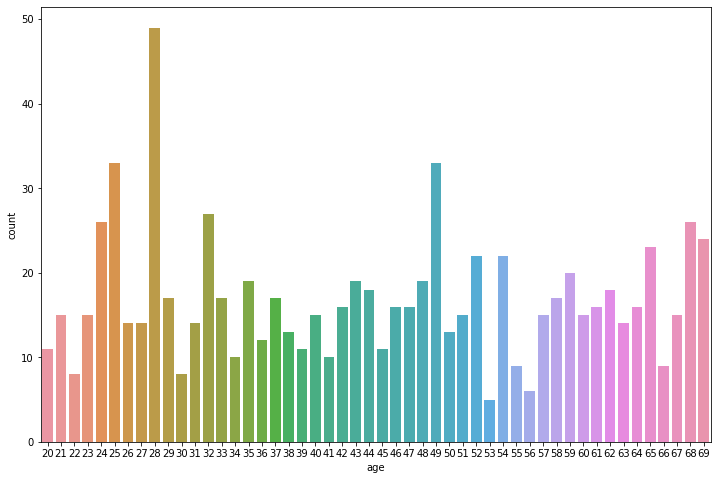

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=platform_by_age)